# Creating graphs from tables of revisions

In this notebook I will demonstrate how to draw graphs of Wikipedia article revision histories using [graphviz](http://www.graphviz.org).

In [1]:
import graphviz

If you already know the [DOT language](https://en.wikipedia.org/wiki/DOT_(graph_description_language), the quickest way to make graphs is from a `graphviz.Source` object.

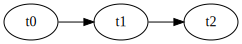

In [2]:
from_dot = graphviz.Source('''
digraph {
    t0 -> t1 -> t2;
    rankdir=LR;
}
''')
from_dot

It's easy enough to write a function that makes graphs like the above from data in a table.

In [3]:
from pandas import DataFrame

def graph(data, remove_labels=False):
    """Create a simple revision history Digraph from a pandas DataFrame.
    
    Args:
        data: A DataFrame with two columns, the first is the **from** column
            and the second is the **to** column. Nodes are derived from edges.
        remove_labels: Should the labels be removed from the nodes? Useful
            when graphing actual revision histories and nodes are named with
            long hashes, in which case the labels are probably not needed.
    """
    g = graphviz.Digraph(graph_attr={'rankdir': 'LR'})
    
    # add the nodes
    nodes = set(data.iloc[:, 0]).union(set(data.iloc[:, 1]))
    for name in nodes:
        label = '' if remove_labels else name
        g.node(name, label=label)
    
    # add the edges
    g.edges([(from_node, to_node) for _, (from_node, to_node) in data.iterrows()])
    
    return g

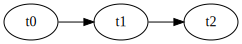

In [4]:
data = DataFrame(dict(from_node=['t0', 't1'], to_node=['t1', 't2']))
graph(data)

## Using wikivision to create graphs from tables of revisions

In [5]:
import wikivision

def graph_article_revisions(article_slug):
    """Create a Digraph from a Wikipedia article's revision history."""
    revisions = wikivision.get_article_revisions(article_slug)
    revision_edges = revisions[['parent_sha1', 'rev_sha1']].iloc[1:]
    return graph(revision_edges, remove_labels=True)

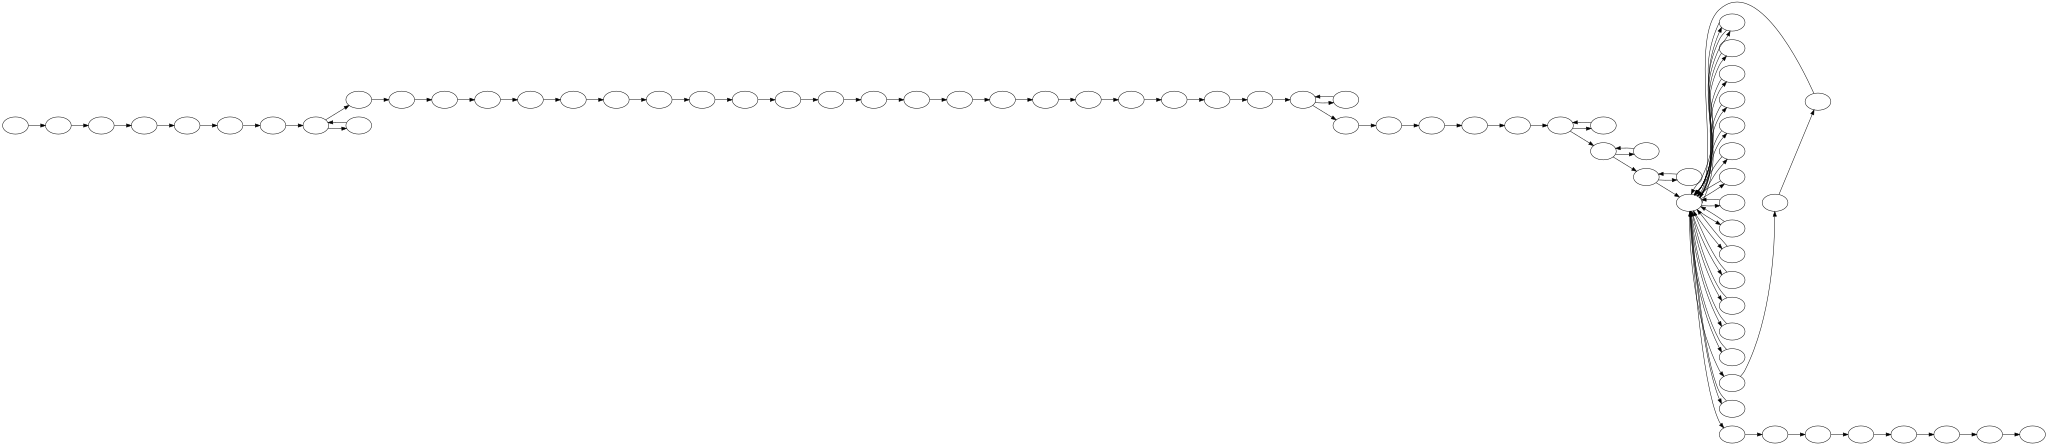

In [6]:
splendid_fairywren = graph_article_revisions('splendid_fairywren')
splendid_fairywren

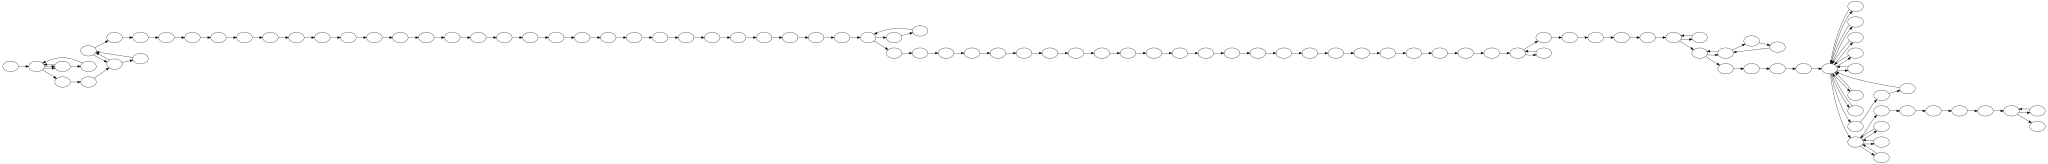

In [7]:
toothcomb = graph_article_revisions('toothcomb')
toothcomb

In [8]:
splendid_fairywren.render('splendid_fairywren')
toothcomb.render('toothcomb')

'toothcomb.pdf'